# Postprocessing Example

## Add directory containing CMS_Deep_Learning repo to the sys path. [repo](https://github.com/DannyWeitekamp/CMS_Deep_Learning/)  [docs](https://dannyweitekamp.github.io/CMS_Deep_Learning/index.html)

In [1]:
%matplotlib inline
if __package__ is None:
    import sys, os
    os.environ["CUDA_VISIBLE_DEVICES"] = '3'
    #sys.path.append(os.path.realpath("/data/shared/Software/CMS_Deep_Learning"))
    sys.path.append(os.path.realpath("/home/dweitekamp/CMS_Deep_Learning"))

## Import stuff

In [2]:
from CMS_Deep_Learning.postprocessing.plot import \
            plot_roc_curve,plot_dual_roc,plot_bins
from CMS_Deep_Learning.postprocessing.metrics import \
            build_accumulator,bin_metric_vs_char,get_roc_data,get_roc_points
import numpy as np
import pandas as pd
import glob
os.environ["DELPHES_DIR"] = "/bigdata/shared/Delphes"

## We will make plots from a subset of the data data here on the culture-plate machine

In [3]:
dirr = '/bigdata/shared/Delphes/postproc_ex'
data_subset = glob.glob(dirr+"/val/*.h5")[:1]

## Plot a ROC Curve with [plot_roc_curve](https://dannyweitekamp.github.io/CMS_Deep_Learning/build/html/postprocessing.html#CMS_Deep_Learning.postprocessing.plot.plot_roc_curve)  (be patient, it takes a long time to grab the data) 

Using Theano backend.


Couldn't import dot_parser, loading of dot files will not be possible.


Using cuDNN version 5105 on context None
Mapped name None to device cuda: GeForce GTX 1080 (0000:07:00.0)


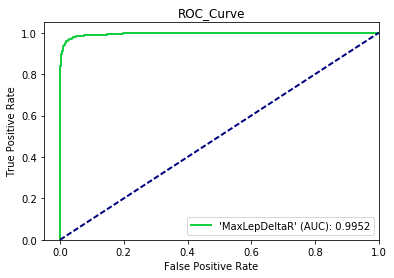

In [4]:
_,roc_dicts = plot_roc_curve(name="MaxLepDeltaR",
                input_keys="Particles", #Or ["HCAL", "ECAL"]
                label_keys="Labels", #Or ["target"]
                model=dirr +"/model.json",
               weights=dirr +"/weights.h5",
               data= data_subset,
               true_class_index=1)

## Plot The same ROC curve quickly by using the precomputed data outputed in the previous cell. These ploting functions are very dynamic. You can input file paths, data, precomputed values and more. 

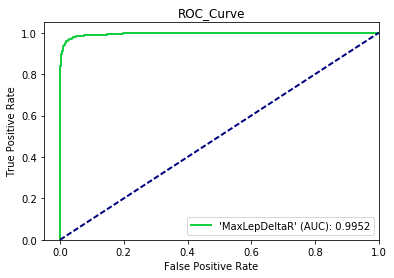

(<module 'matplotlib.pyplot' from '/home/dweitekamp/.local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>,
 [{'ROC_data': (array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
             0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
             0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
             0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
             0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
             0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
             0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
             0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
             0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
             0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
             0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
             0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
             0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
             0.00000000e+00,   

In [5]:
plot_roc_curve(roc_dicts)

## Use [plot_dual_roc](https://dannyweitekamp.github.io/CMS_Deep_Learning/build/html/postprocessing.html#CMS_Deep_Learning.postprocessing.plot.plot_dual_roc) to also plot logscale 

/home/dweitekamp/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


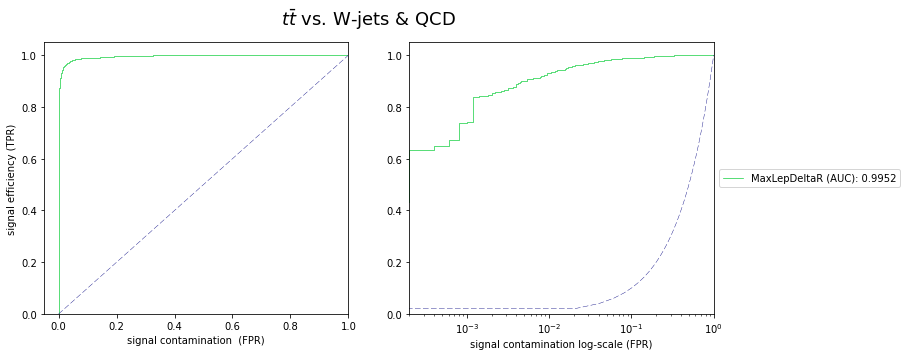

In [6]:
plt, roc_dicts = plot_dual_roc(name="MaxLepDeltaR",
                input_keys="Particles", #Or ["HCAL", "ECAL:]
                label_keys="Labels", #Or ["target"]
                model=dirr +"/model.json",
               weights=dirr +"/weights.h5",
               data= data_subset,#dirr +"/val",
               true_class_index=1,flipped=False, invertCont=False, title=r'$t\bar{t}$ vs. W-jets & QCD')

## Different formatting options availiable...

(<module 'matplotlib.pyplot' from '/home/dweitekamp/.local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>,
 [{'ROC_data': (array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
             0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
             0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
             0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
             0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
             0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
             0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
             0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
             0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
             0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
             0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
             0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
             0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
             0.00000000e+00,   

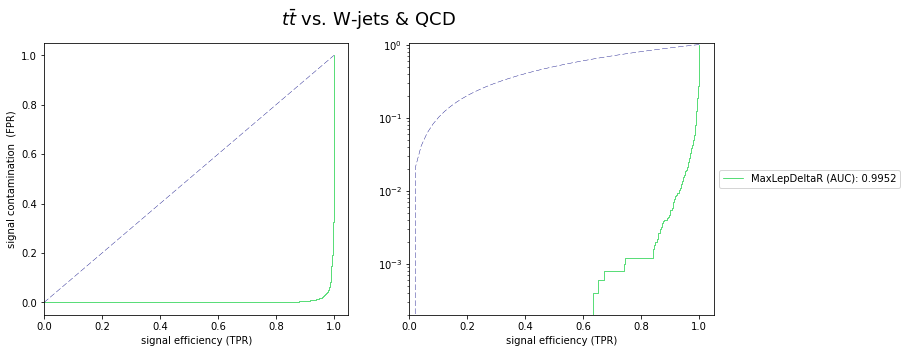

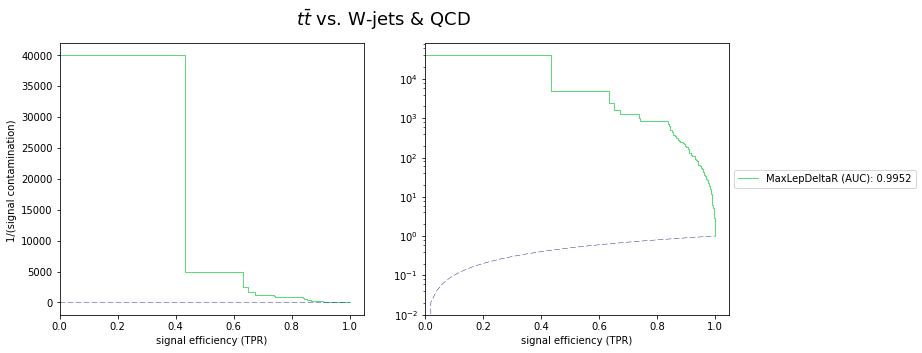

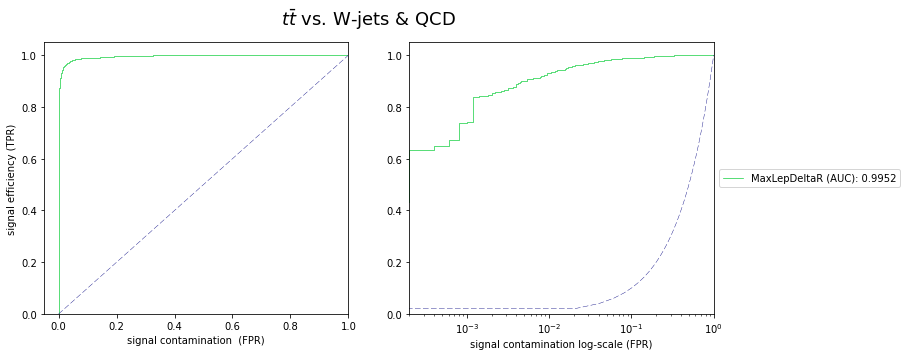

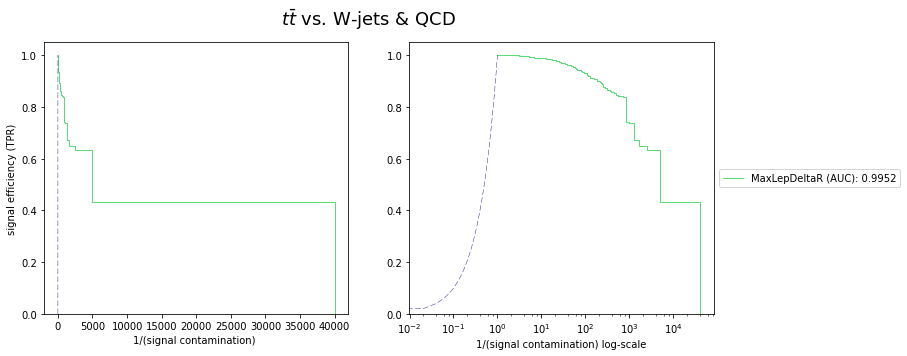

In [7]:
plot_dual_roc(roc_dicts,flipped=True, invertCont=False, title=r'$t\bar{t}$ vs. W-jets & QCD')
plot_dual_roc(roc_dicts,flipped=True, invertCont=True, title=r'$t\bar{t}$ vs. W-jets & QCD')
plot_dual_roc(roc_dicts,flipped=False, invertCont=False, title=r'$t\bar{t}$ vs. W-jets & QCD')
plot_dual_roc(roc_dicts,flipped=False, invertCont=True, title=r'$t\bar{t}$ vs. W-jets & QCD')

 ## Use [get_roc_points](https://dannyweitekamp.github.io/CMS_Deep_Learning/build/html/postprocessing.html#CMS_Deep_Learning.postprocessing.metrics.get_roc_points) to determine the efficiency (tpr) and contamination (fpr) for various thresholds 

In [8]:
class_labels = {0:'QCD',1:r'$t\bar{t}$', 2:"W+jets"}
d = get_roc_points(tpr=[.9,.95,.8], fpr=[.1], thresh=[.33],
                  model=dirr +"/model.json",
                    input_keys="Particles", #Or ["HCAL", "ECAL:]
                    label_keys="Labels", #Or ["target"]
                   weights=dirr +"/weights.h5",
                   true_class_index=1,
                   verbose=1,
                   class_labels=class_labels,
                   data=data_subset)#dirr +"/val",)


(True, True, True)


In [9]:
print(pd.DataFrame(d,columns=["tpr","fpr", "thresh",'fpr:QCD','fpr:W+jets']))

      tpr     fpr    thresh  fpr:QCD  fpr:W+jets
0  0.8396  0.0012  0.938134   0.0012      0.0012
1  0.9000  0.0052  0.838634   0.0056      0.0048
2  0.9504  0.0164  0.495012   0.0168      0.0160
3  0.9648  0.0274  0.328353   0.0280      0.0268
4  0.9892  0.1020  0.048842   0.1180      0.0860


## Use  [build_accumulator](https://dannyweitekamp.github.io/CMS_Deep_Learning/build/html/postprocessing.html#CMS_Deep_Learning.postprocessing.metrics.build_accumulator) to define some characteristic to use for binning. The accumulator is a functional that maps the data to a characteristic. Then use  [bin_metric_vs_char](https://dannyweitekamp.github.io/CMS_Deep_Learning/build/html/postprocessing.html#CMS_Deep_Learning.postprocessing.metrics.bin_metric_vs_char) to make the bins. Although certain features can be grabbed without an accumulator from the HLF collection. 

In [11]:

class_labels = {0:'QCD',1:r'$t\bar{t}$', 2:"W+jets"}
accum = build_accumulator(np.max, "Pt",[{'isChHad': 1}, {'isGamma': 1}, {'isEle':1}])
my_bins = bin_metric_vs_char(model=dirr +"/model.json",
                input_keys="Particles", #Or ["HCAL", "ECAL:]
                label_keys="Labels", #Or ["target"]
               weights=dirr +"/weights.h5",
               data=data_subset,#dirr +"/val",
                accumulate=accum,true_class_index=1)

/usr/lib/python2.7/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


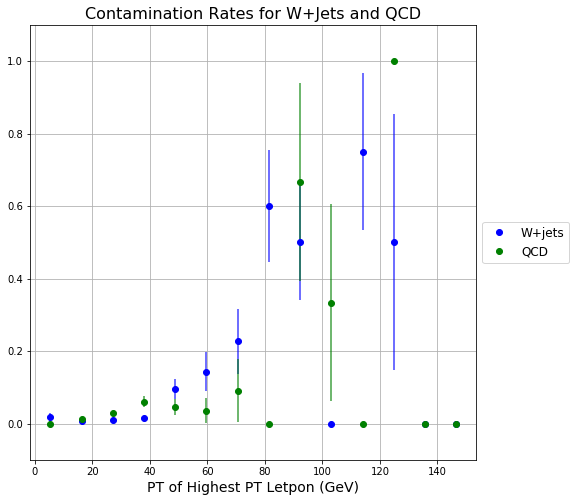

<module 'matplotlib.pyplot' from '/home/dweitekamp/.local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [12]:
class_labels = {0:'QCD',1:r'$t\bar{t}$', 2:"W+jets"}
plot_bins(my_bins, y_val="norm_cont_split",
          mode='scatter',
          ylim=(-.1,1.1),
          class_labels = class_labels,
          xlabel="PT of Highest PT Letpon (GeV)",
          title="Contamination Rates for W+Jets and QCD",
          min_samples=20,
          alpha=.75)

## Use [plot_bins](https://dannyweitekamp.github.io/CMS_Deep_Learning/build/html/postprocessing.html#CMS_Deep_Learning.postprocessing.plot.plot_bins) and choose a y_value for the plot.

ValueError: In safezip, len(args[0])=19 but len(args[1])=1

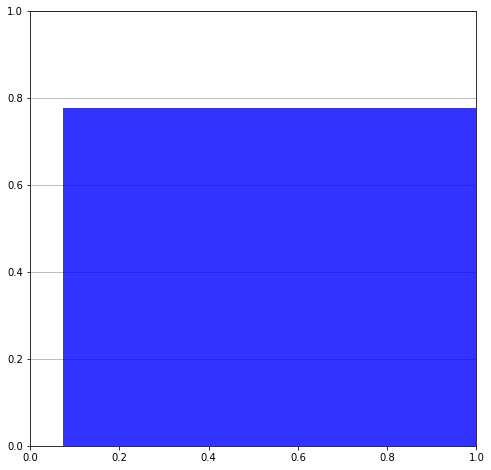

In [14]:
plot_bins(my_bins,y_val='tpr',mode='bar')
plot_bins(my_bins,y_val='acc',mode='scatter')

## Make histograms

In [15]:
class_labels = {0:'QCD',1:r'$t\bar{t}$', 2:"W+jets"}
my_bins2 = bin_metric_vs_char(model=dirr +"/model.json",
               weights=dirr +"/weights.h5",
                input_keys="Particles", #Or ["HCAL", "ECAL:]
                label_keys="Labels", #Or ["target"]
               data=data_subset,
                accumulate=accum,true_class_index=1,
                nb_bins=200)

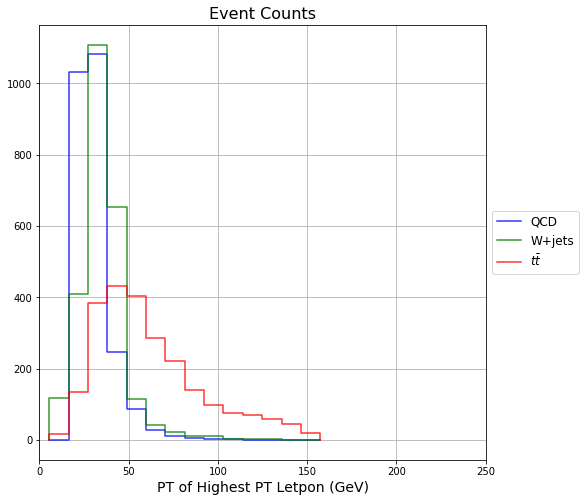

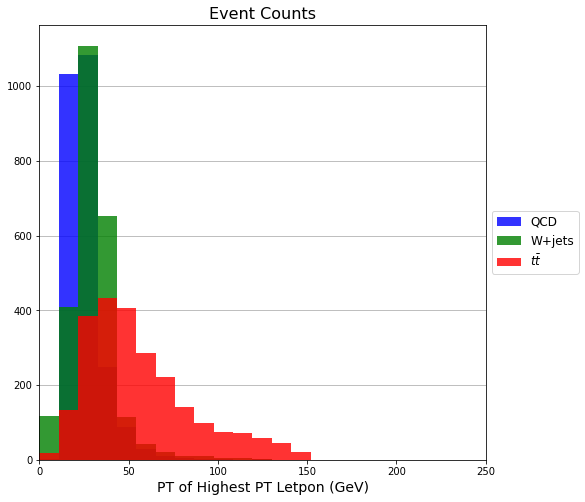

<module 'matplotlib.pyplot' from '/home/dweitekamp/.local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [16]:
plot_bins(my_bins2,
          y_val="freq",
          mode='histo',
          ylim=None,
          class_labels = class_labels,
          xlabel="PT of Highest PT Letpon (GeV)",
          title="Event Counts",
          min_samples=20,
          xlim=(0,250)
         )
plot_bins(my_bins2,
          y_val="freq",
          mode='bar',
          ylim=None,
          class_labels = class_labels,
          xlabel="PT of Highest PT Letpon (GeV)",
          title="Event Counts",
          min_samples=20,
          xlim=(0,250)
         )

## Stacked

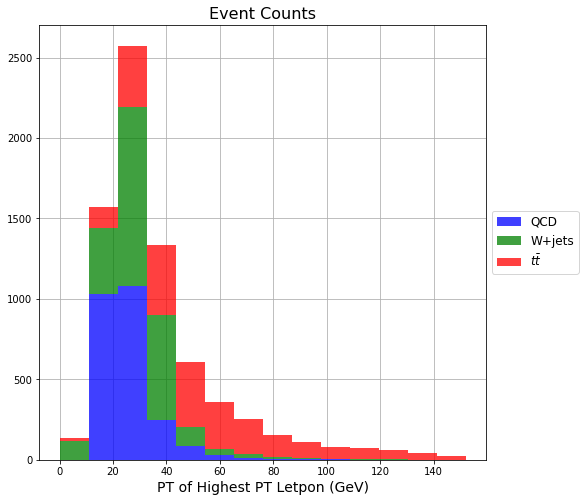

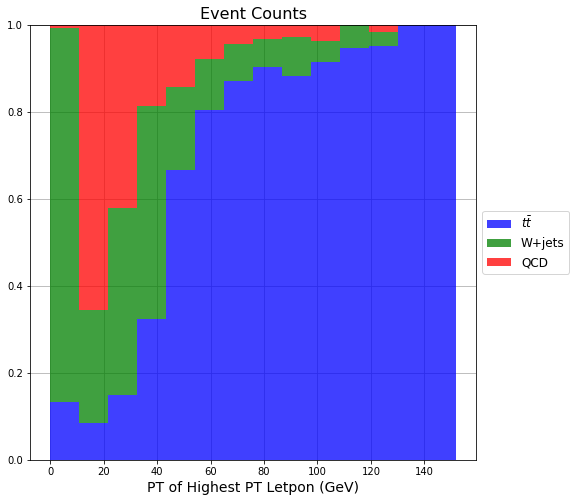

<module 'matplotlib.pyplot' from '/home/dweitekamp/.local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [17]:
plot_bins(my_bins2, y_val="freq",
          mode='histo',
          ylim=None,
          class_labels = class_labels,
          xlabel="PT of Highest PT Letpon (GeV)",
          title="Event Counts",
          stack=True,
          min_samples=20,
          alpha=.75)
plot_bins(my_bins2, y_val="freq",
          mode='histo',
          ylim=None,
          class_labels = class_labels,
          xlabel="PT of Highest PT Letpon (GeV)",
          title="Event Counts",
          stack=True,
          normalize=True,
          min_samples=20,
          alpha=.75)

## plot the total contamination ('fpr': False-Positive Rate)


/home/dweitekamp/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


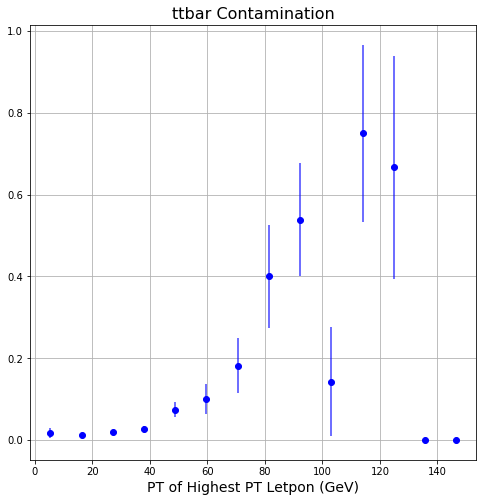

<module 'matplotlib.pyplot' from '/home/dweitekamp/.local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [18]:
plot_bins(my_bins2, y_val="fpr",
          mode='scatter',
          ylim=None,
          class_labels = class_labels,
          xlabel="PT of Highest PT Letpon (GeV)",
          title="ttbar Contamination",
          stack=True,
          min_samples=20,
          alpha=.75)

## And the class contaminations for the 'false' classes individually


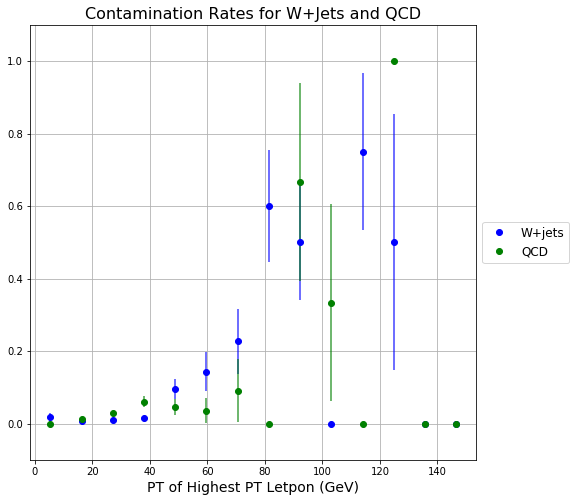

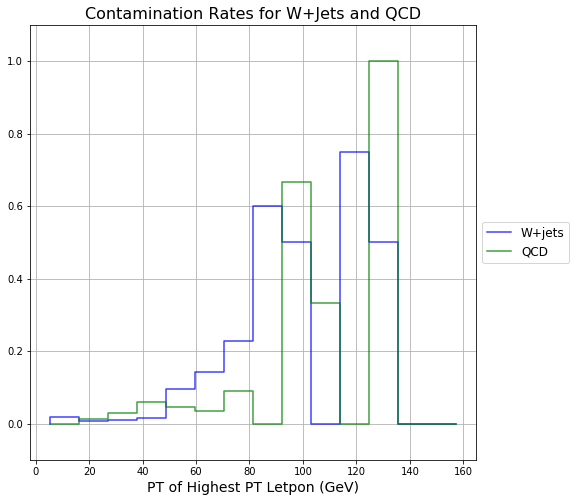

<module 'matplotlib.pyplot' from '/home/dweitekamp/.local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [19]:
plot_bins(my_bins2, y_val="norm_cont_split",
          mode='scatter',
          ylim=(-.1,1.1),
          class_labels = class_labels,
          xlabel="PT of Highest PT Letpon (GeV)",
          title="Contamination Rates for W+Jets and QCD",
          min_samples=20,
          alpha=.75)
plot_bins(my_bins2, y_val="norm_cont_split",
          mode='histo',
          ylim=(-.1,1.1),
          class_labels = class_labels,
          xlabel="PT of Highest PT Letpon (GeV)",
          title="Contamination Rates for W+Jets and QCD",
          min_samples=20,
          alpha=.75)

## Using the [simple_grab](https://dannyweitekamp.github.io/CMS_Deep_Learning/build/html/io.html#CMS_Deep_Learning.io.simple_grab) class to simplify grabbing data

In [20]:
from CMS_Deep_Learning.io import simple_grab
y,pred = simple_grab(["Y",'predictions'],
                    input_keys="Particles", #Or ["HCAL", "ECAL:]
                    label_keys="Labels", #Or ["target"]
                       model=dirr +"/model.json",
                       weights=dirr +"/weights.h5",
                       data=data_subset)

## Using this to find the confusion matrix for the classifier 

In [21]:
_y = np.argmax(y,axis=-1)
_pred = np.argmax(pred,axis=-1)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(_y, _pred, labels=None, sample_weight=None))

[[2361   45   94]
 [  67 2385   48]
 [ 107   45 2348]]


## And of course feel free to copy paste anything in the repository into your own notebooks so that you have more control over the plots. Also pull requests are encouraged... Cheers, Danny (dannyweitekamp@gmail.com)